# CA2 - Supervised machine learning classification pipeline - applied to medical data

### Important information

- Do __not__ use scikit-learn (`sklearn`) or any other high-level machine learning library for this CA
- Explain your code and reasoning in markdown cells or code comments
- Label all graphs and charts if applicable
- If you use code from the internet, make sure to reference it and explain it in your own words
- If you use additional function arguments, make sure to explain them in your own words
- Use the classes `Perceptron`, `Adaline` and `Logistic Regression` from the library `mlxtend` as classifiers (`from mlxtend.classifier import Perceptron, Adaline, LogisticRegression`). _Always_ use the argument `minibatches=1` when instantiating an `Adaline` or `LogisticRegression` object. This makes the model use the gradient descent algorithm for training. Always use the `random_seed=42` argument when instantiating the classifiers. This will make your results reproducible.
- You can use any plotting library you want (e.g. `matplotlib`, `seaborn`, `plotly`, etc.)
- Use explanatory variable names (e.g. `X_train` and `X_train_scaled` for the training data before and after scaling, respectively)
- The dataset is provided in the file `fetal_health.csv` in the `assets` folder

### Additional clues

- Use the `pandas` library for initial data inspection and preprocessing
- Before training the classifiers, convert the data to raw `numpy` arrays
- For Part IV, you are aiming to create a plot that looks similar to this:
<img src="./assets/example_output.png" width="300">

### Additional information

- Feel free to create additional code or markdown cells if you think it will help you explain your reasoning or structure your code (you don't have to).


## Part I: Data loading and data exploration

### Import necessary libraries/modules:

In [1]:
# Insert your code below
# ======================

from mlxtend.classifier import Adaline, LogisticRegression, Perceptron
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

/home/idris/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Loading and exploring data

1. Load the dataset `fetal_health.csv` with `pandas`. Use the first column as the row index.
2. Check for missing data, report on your finding and remove samples with missing data, if you find any.
3. Display the raw data with appropriate plots/outputs and inspect it. Describe the distributions of the values of feature `"baseline value"`, `"accelerations"`, and the target variable `"fetal_health"`.
4. Will it be beneficial to scale the data? Why or why not?
5. Is the data linearly separable using a combination of any two pairs of features? Can we expect an accuracy close to 100% from a linear classifier?

In [2]:
# Insert your code below
# ======================

df = pd.read_csv('assets/fetal_health.csv', index_col=0)
df

,baseline value,accelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mean,histogram_variance,fetal_health
1584,132.0,0.000,0.0,35.0,1.3,0.0,135.0,9.0,0
942,136.0,0.003,0.0,54.0,0.7,15.0,141.0,8.0,0
1376,121.0,0.006,0.0,24.0,1.7,0.0,121.0,25.0,0
169,116.0,0.001,0.0,46.0,0.7,39.0,120.0,1.0,0
1293,115.0,0.006,0.0,19.0,1.7,0.0,121.0,9.0,0
...,...,...,...,...,...,...,...,...,...
2086,133.0,0.000,0.0,74.0,1.3,28.0,134.0,1.0,1
2121,140.0,0.000,0.0,79.0,0.2,25.0,150.0,2.0,1
2122,140.0,0.001,0.0,78.0,0.4,22.0,148.0,3.0,1
2123,140.0,0.001,0.0,79.0,0.4,20.0,148.0,4.0,1


In [3]:
missing_data = df.isna().sum()
print("Missing data:'\n", missing_data)

Missing data:'
 baseline value                                            0
accelerations                                             0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
histogram_mean                                            0
histogram_variance                                        0
fetal_health                                              0
dtype: int64


#### Report: missing data

From the code above we see that there is no missing data here, so it is not neccessary to write code for removing samples with missing data.

In [4]:
print("The shape of the data: ", df.shape)
print()
print("Types in each column:\n", df.dtypes)

The shape of the data:  (1290, 9)

Types in each column:
 baseline value                                            float64
accelerations                                             float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
histogram_mean                                            float64
histogram_variance                                        float64
fetal_health                                                int64
dtype: object


In [5]:
df.describe()

,baseline value,accelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mean,histogram_variance,fetal_health
count,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000
mean,133.868217,0.002657,0.000231,49.758915,1.278682,12.637984,133.982946,19.710078,0.362016
std,10.093266,0.003681,0.000719,17.770759,0.916280,21.033866,17.140582,32.399245,0.480770
min,106.000000,0.000000,0.000000,12.000000,0.200000,0.000000,73.000000,0.000000,0.000000
25%,127.000000,0.000000,0.000000,34.000000,0.600000,0.000000,124.000000,1.000000,0.000000
50%,133.000000,0.001000,0.000000,53.000000,1.100000,0.000000,136.000000,6.000000,0.000000
75%,142.000000,0.004000,0.000000,63.000000,1.700000,17.000000,146.000000,24.000000,1.000000
max,160.000000,0.019000,0.005000,87.000000,6.900000,91.000000,182.000000,269.000000,1.000000


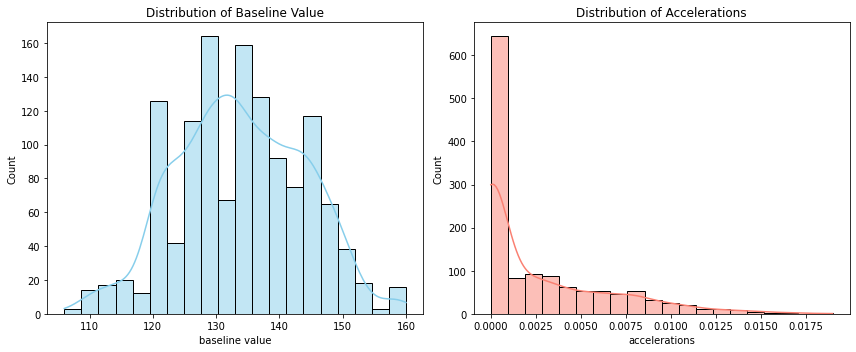

In [6]:
# Plot histograms for baseline value and accelerations
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['baseline value'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Baseline Value')

plt.subplot(1, 2, 2)
sns.histplot(df['accelerations'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Accelerations')

plt.tight_layout()
plt.show()

#### Baseline Value: 
The distrubution seems to be roughly normal, with a peak around the center.

#### Distribution of Acceleration:
The plot here shows that the distribution is skewed to the right.

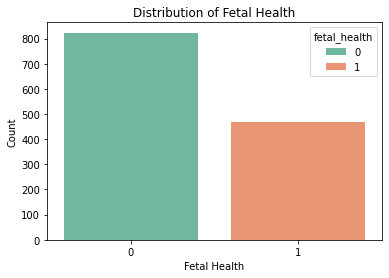

In [7]:
# Plot the distribution of the target variable fetal_health
plt.figure(figsize=(6, 4))
sns.countplot(x='fetal_health', data=df, palette='Set2', hue='fetal_health')
plt.title('Distribution of Fetal Health')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.show()

#### Distribution of Fetal Health

The different health states are shown in the above plot. It seems like there might be an imbalance in the dataset, with some classes having more samples than others.

#### Scaling of data

Since it seems to be some sort of imbalance here, I think that scaling the data will be of great benefit as this will ensure that each feature contributes proportionally to the result. This will prevent the domination of features with large scales in the optimization process. 

#### Is the data linearly separable using a combination of any two pairs of features? Can we expect an accuracy close to 100% from a linear classifier?

Due to the imbalance in the data as seen upon inpection, I suspect that we will not be able to get an accuracy of 100% from the linear classifier. We will be able to differentiate some but not all of them.

## Part II: Train/Test Split

Divide your dataset into training and testing subsets. Follow these steps to create the split:

1. **Divide the dataset into two data sets, each data set only contains samples of either class 0 or class 1:**
- Create a DataFrame `df_0` containing all data with `"fetal_health"` equal to 0.
- Create a DataFrame `df_1` containing all data with `"fetal_health"` equal to 1.

2. **Split into training and test set by randomly sampling entries from the data frames:**
- Create a DataFrame `df_0_train` containing by sampling `75%` of the entries from `df_0` (use the `sample` method of the data frame, fix the `random_state` to `42`).
- Create a DataFrame `df_1_train` using the same approach with `df_1`.
- Create a DataFrame `df_0_test` containing the remaining entries of `df_0` (use `df_0.drop(df_0_train.index)` to drop all entries except the previously extracted ones).
- Create a DataFrame `df_1_test` using the same approach with `df_1`.

3. **Merge the datasets split by classes back together:**
- Create a DataFrame `df_train` containing all entries from `df_0_train` and `df_1_train`. (Hint: use the `concat` method you know from CA1)
- Create a DataFrame `df_test` containing all entries from the two test sets.

4. **Create the following data frames from these splits:**
- `X_train`: Contains all columns of `df_train` except for the target feature `"fetal_health"`
- `X_test`: Contains all columns of `df_test` except for the target feature `"fetal_health"`
- `y_train`: Contains only the target feature `"fetal_health"` for all samples in the training set
- `y_test`: Contains only the target feature `"fetal_health"` for all samples in the test set

5. **Check that your sets have the expected sizes/shape by printing number of rows and colums ("shape") of the data sets.**
- (Sanity check: there should be 8 features, almost 1000 samples in the training set and slightly more than 300 samples in the test set.)


6. **Explain the purpose of this slightly complicated procedure. Why did we first split into the two classes? Why did we then split into a training and a testing set?**


7. **What is the share (in percent) of samples with class 0 label in test and training set, and in the intial data set?**



In [8]:
# Insert your code below
# ======================

df_0 = df[df['fetal_health'] == 0] 
df_0.head()

,baseline value,accelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mean,histogram_variance,fetal_health
1584,132.0,0.000,0.0,35.0,1.3,0.0,135.0,9.0,0
942,136.0,0.003,0.0,54.0,0.7,15.0,141.0,8.0,0
1376,121.0,0.006,0.0,24.0,1.7,0.0,121.0,25.0,0
169,116.0,0.001,0.0,46.0,0.7,39.0,120.0,1.0,0
1293,115.0,0.006,0.0,19.0,1.7,0.0,121.0,9.0,0


In [9]:
df_1 = df[df['fetal_health'] == 1]
df_1.head()

,baseline value,accelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mean,histogram_variance,fetal_health
0,120.0,0.000,0.000,73.0,0.5,43.0,137.0,73.0,1
5,134.0,0.001,0.002,26.0,5.9,0.0,107.0,170.0,1
6,134.0,0.001,0.003,29.0,6.3,0.0,107.0,215.0,1
7,122.0,0.000,0.000,83.0,0.5,6.0,122.0,3.0,1
8,122.0,0.000,0.000,84.0,0.5,5.0,122.0,3.0,1


In [10]:
df_0_train = df_0.sample(int(len(df_0) * 0.75), random_state=42)
df_0_train.head()

,baseline value,accelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mean,histogram_variance,fetal_health
562,128.0,0.000,0.0,46.0,2.1,0.0,123.0,17.0,0
145,143.0,0.008,0.0,50.0,0.9,0.0,150.0,6.0,0
1534,136.0,0.000,0.0,36.0,1.0,0.0,137.0,3.0,0
1638,130.0,0.009,0.0,52.0,1.3,0.0,141.0,16.0,0
911,146.0,0.003,0.0,25.0,2.5,0.0,145.0,32.0,0


In [11]:
df_1_train = df_1.sample(int(len(df_1)*0.75), random_state=42)
df_1_train.head()

,baseline value,accelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mean,histogram_variance,fetal_health
238,125.0,0.000,0.000,66.0,0.3,46.0,124.0,0.0,1
250,148.0,0.003,0.000,61.0,0.5,26.0,152.0,2.0,1
116,123.0,0.000,0.002,26.0,4.3,0.0,105.0,117.0,1
2086,133.0,0.000,0.000,74.0,1.3,28.0,134.0,1.0,1
294,146.0,0.000,0.000,66.0,0.5,38.0,146.0,2.0,1


In [12]:
df_0_test = df_0.drop(df_0_train.index)
df_0_test.head()

,baseline value,accelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mean,histogram_variance,fetal_health
942,136.0,0.003,0.0,54.0,0.7,15.0,141.0,8.0,0
1293,115.0,0.006,0.0,19.0,1.7,0.0,121.0,9.0,0
2084,128.0,0.001,0.0,76.0,1.7,25.0,127.0,1.0,0
246,128.0,0.007,0.0,48.0,1.0,0.0,137.0,6.0,0
284,128.0,0.007,0.0,44.0,1.1,0.0,136.0,5.0,0


In [13]:
df_1_test = df_1.drop(df_1_train.index)
df_1_test.head()

,baseline value,accelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mean,histogram_variance,fetal_health
5,134.0,0.001,0.002,26.0,5.9,0.0,107.0,170.0,1
17,131.0,0.002,0.002,18.0,2.4,0.0,125.0,45.0,1
25,124.0,0.000,0.000,86.0,0.3,72.0,124.0,0.0,1
26,124.0,0.000,0.000,86.0,0.4,14.0,126.0,0.0,1
55,149.0,0.000,0.000,57.0,1.2,54.0,148.0,8.0,1


In [14]:
df_train = pd.concat([df_0_train, df_1_train])
df_train.shape

(967, 9)

In [15]:
df_test = pd.concat([df_0_test, df_1_test])
df_test.shape

(323, 9)

In [16]:
X_train = df_train.loc[:, df_train.columns!='fetal_health']
X_train.shape

(967, 8)

In [17]:
X_test = df_test.loc[:, df_test.columns!='fetal_health']
X_test.shape

(323, 8)

In [18]:
y_train = df_train.loc[:, df_train.columns=='fetal_health']
y_train

,fetal_health
562,0
145,0
1534,0
1638,0
911,0
...,...
475,1
1905,1
92,1
2032,1


In [19]:
y_test = df_test.iloc[:, df_test.columns=='fetal_health']
y_test

,fetal_health
942,0
1293,0
2084,0
246,0
284,0
...,...
2030,1
2035,1
2038,1
2121,1


#### Explain the purpose of this slightly complicated procedure. Why did we first split into the two classes? Why did we then split into a training and a testing set?

First we wanted to differentiate between the data as there are two values for the target variable we are looking for, namely 1 and 0. So we split the data based upon these two classes. The reason for why we split the data into a trainig set is because we want a part from the data where we can train our model on it. The test set is supposed to be new unseen data that we will not be shown to our model, because it is supposed to predict the outcome of the classes for this set based upon its training on the training set.

In [20]:
share_class_0_initial = (df['fetal_health'] == 0).mean() * 100
share_class_0_train = (df_train['fetal_health'] == 0).mean() * 100
share_class_0_test = (df_test['fetal_health'] == 0).mean() * 100

print("Share of class 0 label samples in initial dataset: {:.2f}%".format(share_class_0_initial))
print("Share of class 0 label samples in training set: {:.2f}%".format(share_class_0_train))
print("Share of class 0 label samples in test set: {:.2f}%".format(share_class_0_test))

Share of class 0 label samples in initial dataset: 63.80%
Share of class 0 label samples in training set: 63.81%
Share of class 0 label samples in test set: 63.78%


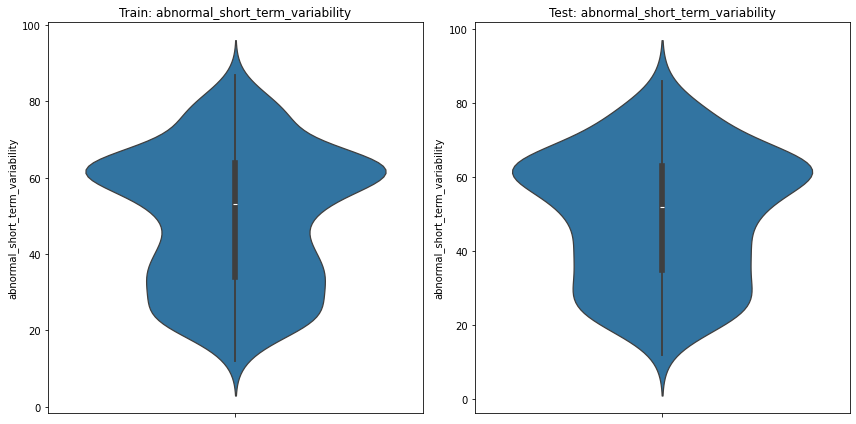

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(data=X_train, y='abnormal_short_term_variability', ax=axes[0])
axes[0].set_title('Train: abnormal_short_term_variability')

axes[1].set_title('Test: abnormal_short_term_variability')
sns.violinplot(data=X_test, y='abnormal_short_term_variability', ax=axes[1])

fig.tight_layout()
plt.show()

### Convert data to numpy arrays and shuffle the training data

Many machine learning models (including those you will work with later in the assignment) will not accept DataFrames as input. Instead, they will only work if you pass numpy arrays containing the data.
Here, we convert the DataFrames `X_train`, `X_test`, `y_train`, and `y_test` to numpy arrays `X_train`, `X_test`, `y_train`, and `y_test`.

Moreover we shuffle the training data. This is important because the training data is currently ordered by class. In Part IV, we use the first n samples from the training set to train the classifiers. If we did not shuffle the data, the classifiers would only be trained on samples of class 0.

Nothing to be done here, just execute the cell.

In [22]:
# convert to numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# shuffle training data
np.random.seed(42) # for reproducibility
shuffle_index = np.random.permutation(len(X_train)) # generate random indices
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] # shuffle data by applying reordering with the random indices

## Part III: Scaling the data

1. Standardize the training _and_ test data so that each feature has a mean of 0 and a standard deviation of 1.
2. Check that the scaling was successful
    - by printing the mean and standard deviation of each feature in the scaled training set
    - by putting the scaled training set into a DataFrame and make a violin plot of the data

__Hint:__ use the `axis` argument to calculate mean and standard deviation column-wise.

__Important:__ Avoid data leakage!

__More hints:__

1. For each column, subtract the mean $(\mu)$ of each column from each value in the column
2. Divide the result by the standard deviation $(\sigma)$ of the column

(You saw how to do both operations in the lecture. If you don't remember, you can look it up in Canvas files.)

Mathematically (in case this is useful for you), this transformation can be represented for each column as follows:

$$ X_\text{scaled} = \frac{(X - \mu)}{\sigma} $$

where:
- $(X_\text{scaled})$ are the new, transformed column values (a column-vector)
- $(X)$ is the original values
- $(\mu)$ is the mean of the column
- $(\sigma)$ is the standard deviation of the column



In [23]:
# Insert your code below
# ======================

X_train_sc = (X_train - X_train.mean(axis=0))/X_train.std(axis=0)


print("The mean of columns after scaling:\n ", X_train_sc.mean(axis=0))
print("The standard deviation of columns after scaling: ", X_train_sc.std(axis=0))

The mean of columns after scaling:
  [-1.31803106e-16  4.56925087e-15 -2.96097744e-16  1.33869705e-16
 -2.12543989e-17 -2.86453614e-16 -2.93342278e-16 -7.18717284e-17]
The standard deviation of columns after scaling:  [1. 1. 1. 1. 1. 1. 1. 1.]


In [24]:
X_test_sc = (X_test - X_test.mean(axis=0))/X_test.std(axis=0)

print("The mean of columns after scaling:\n ", X_test_sc.mean(axis=0))
print("The standard deviation of columns after scaling: ", X_test_sc.std(axis=0))

The mean of columns after scaling:
  [-7.91936176e-16 -1.31989363e-16 -6.59946813e-17 -8.79929085e-17
 -1.31989363e-16  0.00000000e+00 -2.74977839e-16 -4.26215650e-17]
The standard deviation of columns after scaling:  [1. 1. 1. 1. 1. 1. 1. 1.]


In [25]:
X_train_df_sc = pd.DataFrame(X_train_sc)
X_test_df_sc = pd.DataFrame(X_test_sc)

X_train_df_sc

,0,1,2,3,4,5,6,7
0,-0.090625,-0.712232,-0.318725,-1.659977,1.456053,-0.599080,-0.459343,1.028936
1,0.789634,0.955390,-0.318725,-0.486913,-0.301480,-0.599080,0.757920,-0.480945
2,-0.579658,-0.712232,4.042700,-1.101375,0.906824,-0.599080,-1.734572,3.444746
3,0.104988,2.623013,-0.318725,0.518569,-0.301480,-0.599080,0.526060,-0.420549
4,0.594021,2.067139,-0.318725,0.462709,-0.081788,-0.599080,1.743323,0.213601
...,...,...,...,...,...,...,...,...
962,0.202794,0.677453,-0.318725,-0.710354,-0.081788,-0.599080,0.178271,0.032415
963,-2.144564,-0.712232,-0.318725,-1.380676,0.028058,-0.599080,-1.038993,-0.541340
964,2.452346,-0.712232,-0.318725,0.686150,-0.850708,-0.321300,1.685358,-0.541340
965,-1.068691,1.233327,-0.318725,-0.877935,-0.411325,-0.089816,-0.343414,-0.511142


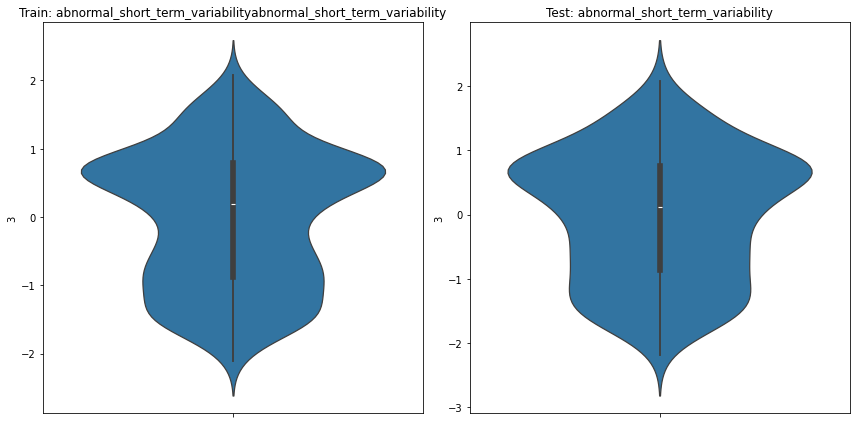

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(data=X_train_df_sc, y=3, ax=axes[0])
axes[0].set_title('Train: abnormal_short_term_variabilityabnormal_short_term_variability')

axes[1].set_title('Test: abnormal_short_term_variability')
sns.violinplot(data=X_test_df_sc, y=3, ax=axes[1])

fig.tight_layout()
plt.show()

## Part IV: Training and evaluation with different dataset sizes and training times

Often, a larger dataset size will yield better model performance. (As we will learn later, this usually prevents overfitting and increases the generalization capability of the trained model.)
However, collecting data is usually rather expensive.

In this part of the exercise, you will investigate

- how the model performance changes with varying dataset size
- how the model performance changes with varying numbers of epochs/iterations of the optimizer/solver (increasing training time).

For this task (Part IV), use the `Adaline`, `Perceptron`, and `LogisticRegression` classifier from the `mlxtend` library. All use the gradient descent (GD) algorithm for training.

__Important__: Use a learning rate of `1e-4` (`0.0001`) for all classifiers, and use the argument `minibatches=1` when initializing `Adaline` and `LogisticRegression` classifier (this will make sure it uses GD). For all three classifiers, pass `random_seed=42` when initializing the classifier to ensure reproducibility of the results.

### Model training

Train the model models using progressively larger subsets of your dataset, specifically: first 50 rows, first 100 rows, first 150 rows, ..., first 650 rows, first 700 rows (in total $14$ different variants).

For each number of rows train the model with progressively larger number of epochs: 2, 7, 12, 17, ..., 87, 92, 97 (in total $20$ different model variants).

The resulting $14 \times 20 = 280$ models obtained from the different combinations of subsets and number of epochs. An output of the training process could look like this:

```
Model (1) Train a model with first 50 rows of data for 2 epochs
Model (2) Train a model with first 50 rows of data for 7 epochs
Model (3) Train a model with first 50 rows of data for 12 epochs
...
Model (21) Train a model with first 100 rows of data for 2 epochs
Model (22) Train a model with first 100 rows of data for 7 epochs
...
Model (279) Train a model with first 700 rows of data for 92 epochs
Model (280) Train a model with first 700 rows of data for 97 epochs
```

### Model evaluation

For each of the $280$ models, calculate the __accuracy on the test set__ (do __not__ use the score method but compute accuracy yourself).
Store the results in the provided 2D numpy array (it has $14$ rows and $20$ columns).
The rows of the array correspond to the different dataset sizes, and the columns correspond to the different numbers of epochs.

### Tasks
1. Train the $280$ Adaline classifiers as mentioned above and calculate the accuracy for each of the $280$ variants.
2. Generalize your code so that is doing the same procedure for all three classifiers: `Perceptron`, `Adaline`, and `LogisticRegression` after each other. Store the result for all classifiers. You can for example use an array of shape $3\times14\times20$ to store the accuracies of the three classifiers.

Note that executing the cells will take some time (but on most systems it should not be more than 5 minutes).

In [27]:
# Train and evaluate all model variants
# Insert your code below
# ======================
learning_rate = .0001
seed = 42
dataset_sizes = [i for i in range(50, 750, 50)]
num_epochs = [i for i in range(2, 102, 5)]
accuracies = np.zeros((3, len(dataset_sizes), len(num_epochs)))

model_num = 1

classifiers = {
                'Perceptron': Perceptron(),
                'Adaline': Adaline(),
                'Logistic Rgression': LogisticRegression()
              }



for idx, (clf_name, clf) in enumerate(classifiers.items()):
    
    for i, size in enumerate(dataset_sizes):
        X_subset = X_train_sc[:size]
        y_subset = y_train[:size].ravel()
        
        for j, epoch in enumerate(num_epochs):
            
            clf.eta = learning_rate 
            clf.epochs = epoch
            clf.random_seed = seed
            
            if clf_name != 'Perceptron':
                clf.minibatches = 1
                
            clf.fit(X_subset, y_subset)
            
            print(f"Model ({model_num}) Train a model with first {size} rows of data for {epoch} epochs")
            model_num += 1

            y_pred = clf.predict(X_test_sc)
            num_classified = (y_test.ravel() != y_pred).sum()
            accuracy = 1 - num_classified / len(y_test)
            
            accuracies[idx, i, j] = accuracy

Model (1) Train a model with first 50 rows of data for 2 epochs
Model (2) Train a model with first 50 rows of data for 7 epochs
Model (3) Train a model with first 50 rows of data for 12 epochs
Model (4) Train a model with first 50 rows of data for 17 epochs
Model (5) Train a model with first 50 rows of data for 22 epochs
Model (6) Train a model with first 50 rows of data for 27 epochs
Model (7) Train a model with first 50 rows of data for 32 epochs
Model (8) Train a model with first 50 rows of data for 37 epochs
Model (9) Train a model with first 50 rows of data for 42 epochs
Model (10) Train a model with first 50 rows of data for 47 epochs
Model (11) Train a model with first 50 rows of data for 52 epochs
Model (12) Train a model with first 50 rows of data for 57 epochs
Model (13) Train a model with first 50 rows of data for 62 epochs
Model (14) Train a model with first 50 rows of data for 67 epochs
Model (15) Train a model with first 50 rows of data for 72 epochs
Model (16) Train a mo

Model (124) Train a model with first 350 rows of data for 17 epochs
Model (125) Train a model with first 350 rows of data for 22 epochs
Model (126) Train a model with first 350 rows of data for 27 epochs
Model (127) Train a model with first 350 rows of data for 32 epochs
Model (128) Train a model with first 350 rows of data for 37 epochs
Model (129) Train a model with first 350 rows of data for 42 epochs
Model (130) Train a model with first 350 rows of data for 47 epochs
Model (131) Train a model with first 350 rows of data for 52 epochs
Model (132) Train a model with first 350 rows of data for 57 epochs
Model (133) Train a model with first 350 rows of data for 62 epochs
Model (134) Train a model with first 350 rows of data for 67 epochs
Model (135) Train a model with first 350 rows of data for 72 epochs
Model (136) Train a model with first 350 rows of data for 77 epochs
Model (137) Train a model with first 350 rows of data for 82 epochs
Model (138) Train a model with first 350 rows of

Model (245) Train a model with first 650 rows of data for 22 epochs
Model (246) Train a model with first 650 rows of data for 27 epochs
Model (247) Train a model with first 650 rows of data for 32 epochs
Model (248) Train a model with first 650 rows of data for 37 epochs
Model (249) Train a model with first 650 rows of data for 42 epochs
Model (250) Train a model with first 650 rows of data for 47 epochs
Model (251) Train a model with first 650 rows of data for 52 epochs
Model (252) Train a model with first 650 rows of data for 57 epochs
Model (253) Train a model with first 650 rows of data for 62 epochs
Model (254) Train a model with first 650 rows of data for 67 epochs
Model (255) Train a model with first 650 rows of data for 72 epochs
Model (256) Train a model with first 650 rows of data for 77 epochs
Model (257) Train a model with first 650 rows of data for 82 epochs
Model (258) Train a model with first 650 rows of data for 87 epochs
Model (259) Train a model with first 650 rows of

Model (432) Train a model with first 400 rows of data for 57 epochs
Model (433) Train a model with first 400 rows of data for 62 epochs
Model (434) Train a model with first 400 rows of data for 67 epochs
Model (435) Train a model with first 400 rows of data for 72 epochs
Model (436) Train a model with first 400 rows of data for 77 epochs
Model (437) Train a model with first 400 rows of data for 82 epochs
Model (438) Train a model with first 400 rows of data for 87 epochs
Model (439) Train a model with first 400 rows of data for 92 epochs
Model (440) Train a model with first 400 rows of data for 97 epochs
Model (441) Train a model with first 450 rows of data for 2 epochs
Model (442) Train a model with first 450 rows of data for 7 epochs
Model (443) Train a model with first 450 rows of data for 12 epochs
Model (444) Train a model with first 450 rows of data for 17 epochs
Model (445) Train a model with first 450 rows of data for 22 epochs
Model (446) Train a model with first 450 rows of d

Model (595) Train a model with first 100 rows of data for 72 epochs
Model (596) Train a model with first 100 rows of data for 77 epochs
Model (597) Train a model with first 100 rows of data for 82 epochs
Model (598) Train a model with first 100 rows of data for 87 epochs
Model (599) Train a model with first 100 rows of data for 92 epochs
Model (600) Train a model with first 100 rows of data for 97 epochs
Model (601) Train a model with first 150 rows of data for 2 epochs
Model (602) Train a model with first 150 rows of data for 7 epochs
Model (603) Train a model with first 150 rows of data for 12 epochs
Model (604) Train a model with first 150 rows of data for 17 epochs
Model (605) Train a model with first 150 rows of data for 22 epochs
Model (606) Train a model with first 150 rows of data for 27 epochs
Model (607) Train a model with first 150 rows of data for 32 epochs
Model (608) Train a model with first 150 rows of data for 37 epochs
Model (609) Train a model with first 150 rows of d

Model (722) Train a model with first 450 rows of data for 7 epochs
Model (723) Train a model with first 450 rows of data for 12 epochs
Model (724) Train a model with first 450 rows of data for 17 epochs
Model (725) Train a model with first 450 rows of data for 22 epochs
Model (726) Train a model with first 450 rows of data for 27 epochs
Model (727) Train a model with first 450 rows of data for 32 epochs
Model (728) Train a model with first 450 rows of data for 37 epochs
Model (729) Train a model with first 450 rows of data for 42 epochs
Model (730) Train a model with first 450 rows of data for 47 epochs
Model (731) Train a model with first 450 rows of data for 52 epochs
Model (732) Train a model with first 450 rows of data for 57 epochs
Model (733) Train a model with first 450 rows of data for 62 epochs
Model (734) Train a model with first 450 rows of data for 67 epochs
Model (735) Train a model with first 450 rows of data for 72 epochs
Model (736) Train a model with first 450 rows of 

In [32]:
accuracies

array([[[0.80495356, 0.85139319, 0.85139319, 0.85758514, 0.86068111,
         0.87306502, 0.88235294, 0.89473684, 0.88235294, 0.88854489,
         0.88544892, 0.86996904, 0.86996904, 0.88544892, 0.87925697,
         0.86377709, 0.86996904, 0.84210526, 0.88544892, 0.87616099],
        [0.81733746, 0.85448916, 0.86377709, 0.86687307, 0.86996904,
         0.88235294, 0.85758514, 0.80804954, 0.85448916, 0.85139319,
         0.74303406, 0.85758514, 0.87616099, 0.85139319, 0.86687307,
         0.86068111, 0.86996904, 0.86068111, 0.87306502, 0.85139319],
        [0.82972136, 0.85448916, 0.85139319, 0.81733746, 0.84829721,
         0.81733746, 0.86687307, 0.84829721, 0.87616099, 0.6625387 ,
         0.83591331, 0.84520124, 0.83281734, 0.83591331, 0.87616099,
         0.85139319, 0.87925697, 0.85448916, 0.85139319, 0.86068111],
        [0.85448916, 0.88235294, 0.87306502, 0.82972136, 0.89783282,
         0.86687307, 0.87306502, 0.86068111, 0.83900929, 0.82352941,
         0.83900929, 0.81733746

### Performance visualization

Plot the performance measure for all classifiers (accuracy on the test set; use the result array from above) of all the $280$ variants for each classifier in a total of three heatmaps using, for example `seaborn` or `matplotlib` directly.

The color should represent the accuracy on the test set, and the x and y axes should represent the number of epochs and the dataset size, respectively.
Which one is x and which one is y is up to you to decide. Look in the example output at the top of the assignment for inspiration for how the plot could look like and how it could be labeled nicely. (But use the correct numbers corresponding to your dataset sizes and number of epochs.)

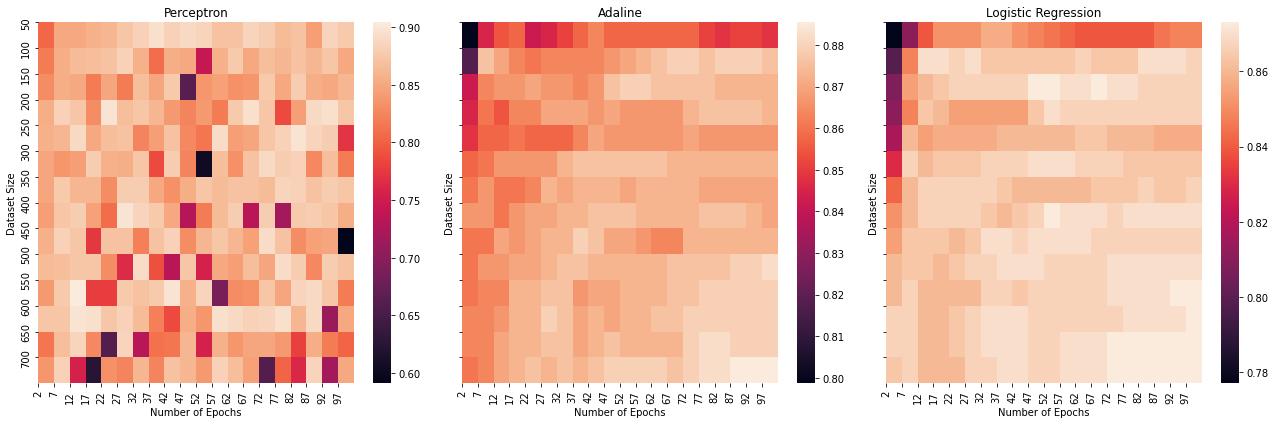

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

classifier_names = ['Perceptron', 'Adaline',  'Logistic Regression']

for i, classifier_name in enumerate(classifier_names):
    classifier_accuracies = accuracies[i]
    
    heatmap = sns.heatmap(classifier_accuracies, ax=axes[i], cmap='rocket' )
    
    axes[i].set_title(classifier_name)
    axes[i].set_xlabel('Number of Epochs')
    axes[i].set_ylabel('Dataset Size')
    
    heatmap.set_xticks(range(0, len(num_epochs)))
    heatmap.set_yticks(range(0, len(dataset_sizes)))
    
    x_labels = num_epochs 
    y_labels = dataset_sizes
    heatmap.set_xticklabels(x_labels)
    heatmap.set_yticklabels(y_labels)

plt.tight_layout()
plt.show()

# Part V: Some more plotting

For the following cell to execute you need to have the variable `X_test_scaled` with all samples of the test set and the variable `y_test` with the corresponding labels.
Complete at least up until Part III. Executing the cell will plot something.

1. Add code comments explaining what the lines are doing
2. What is the purpose of the plot?
3. Describe all components of the subplot and then comment in general on the entire plot. What does it show? What does it not show?

In [30]:
X_test_scaled = X_test_sc
y_test = y_test.ravel()

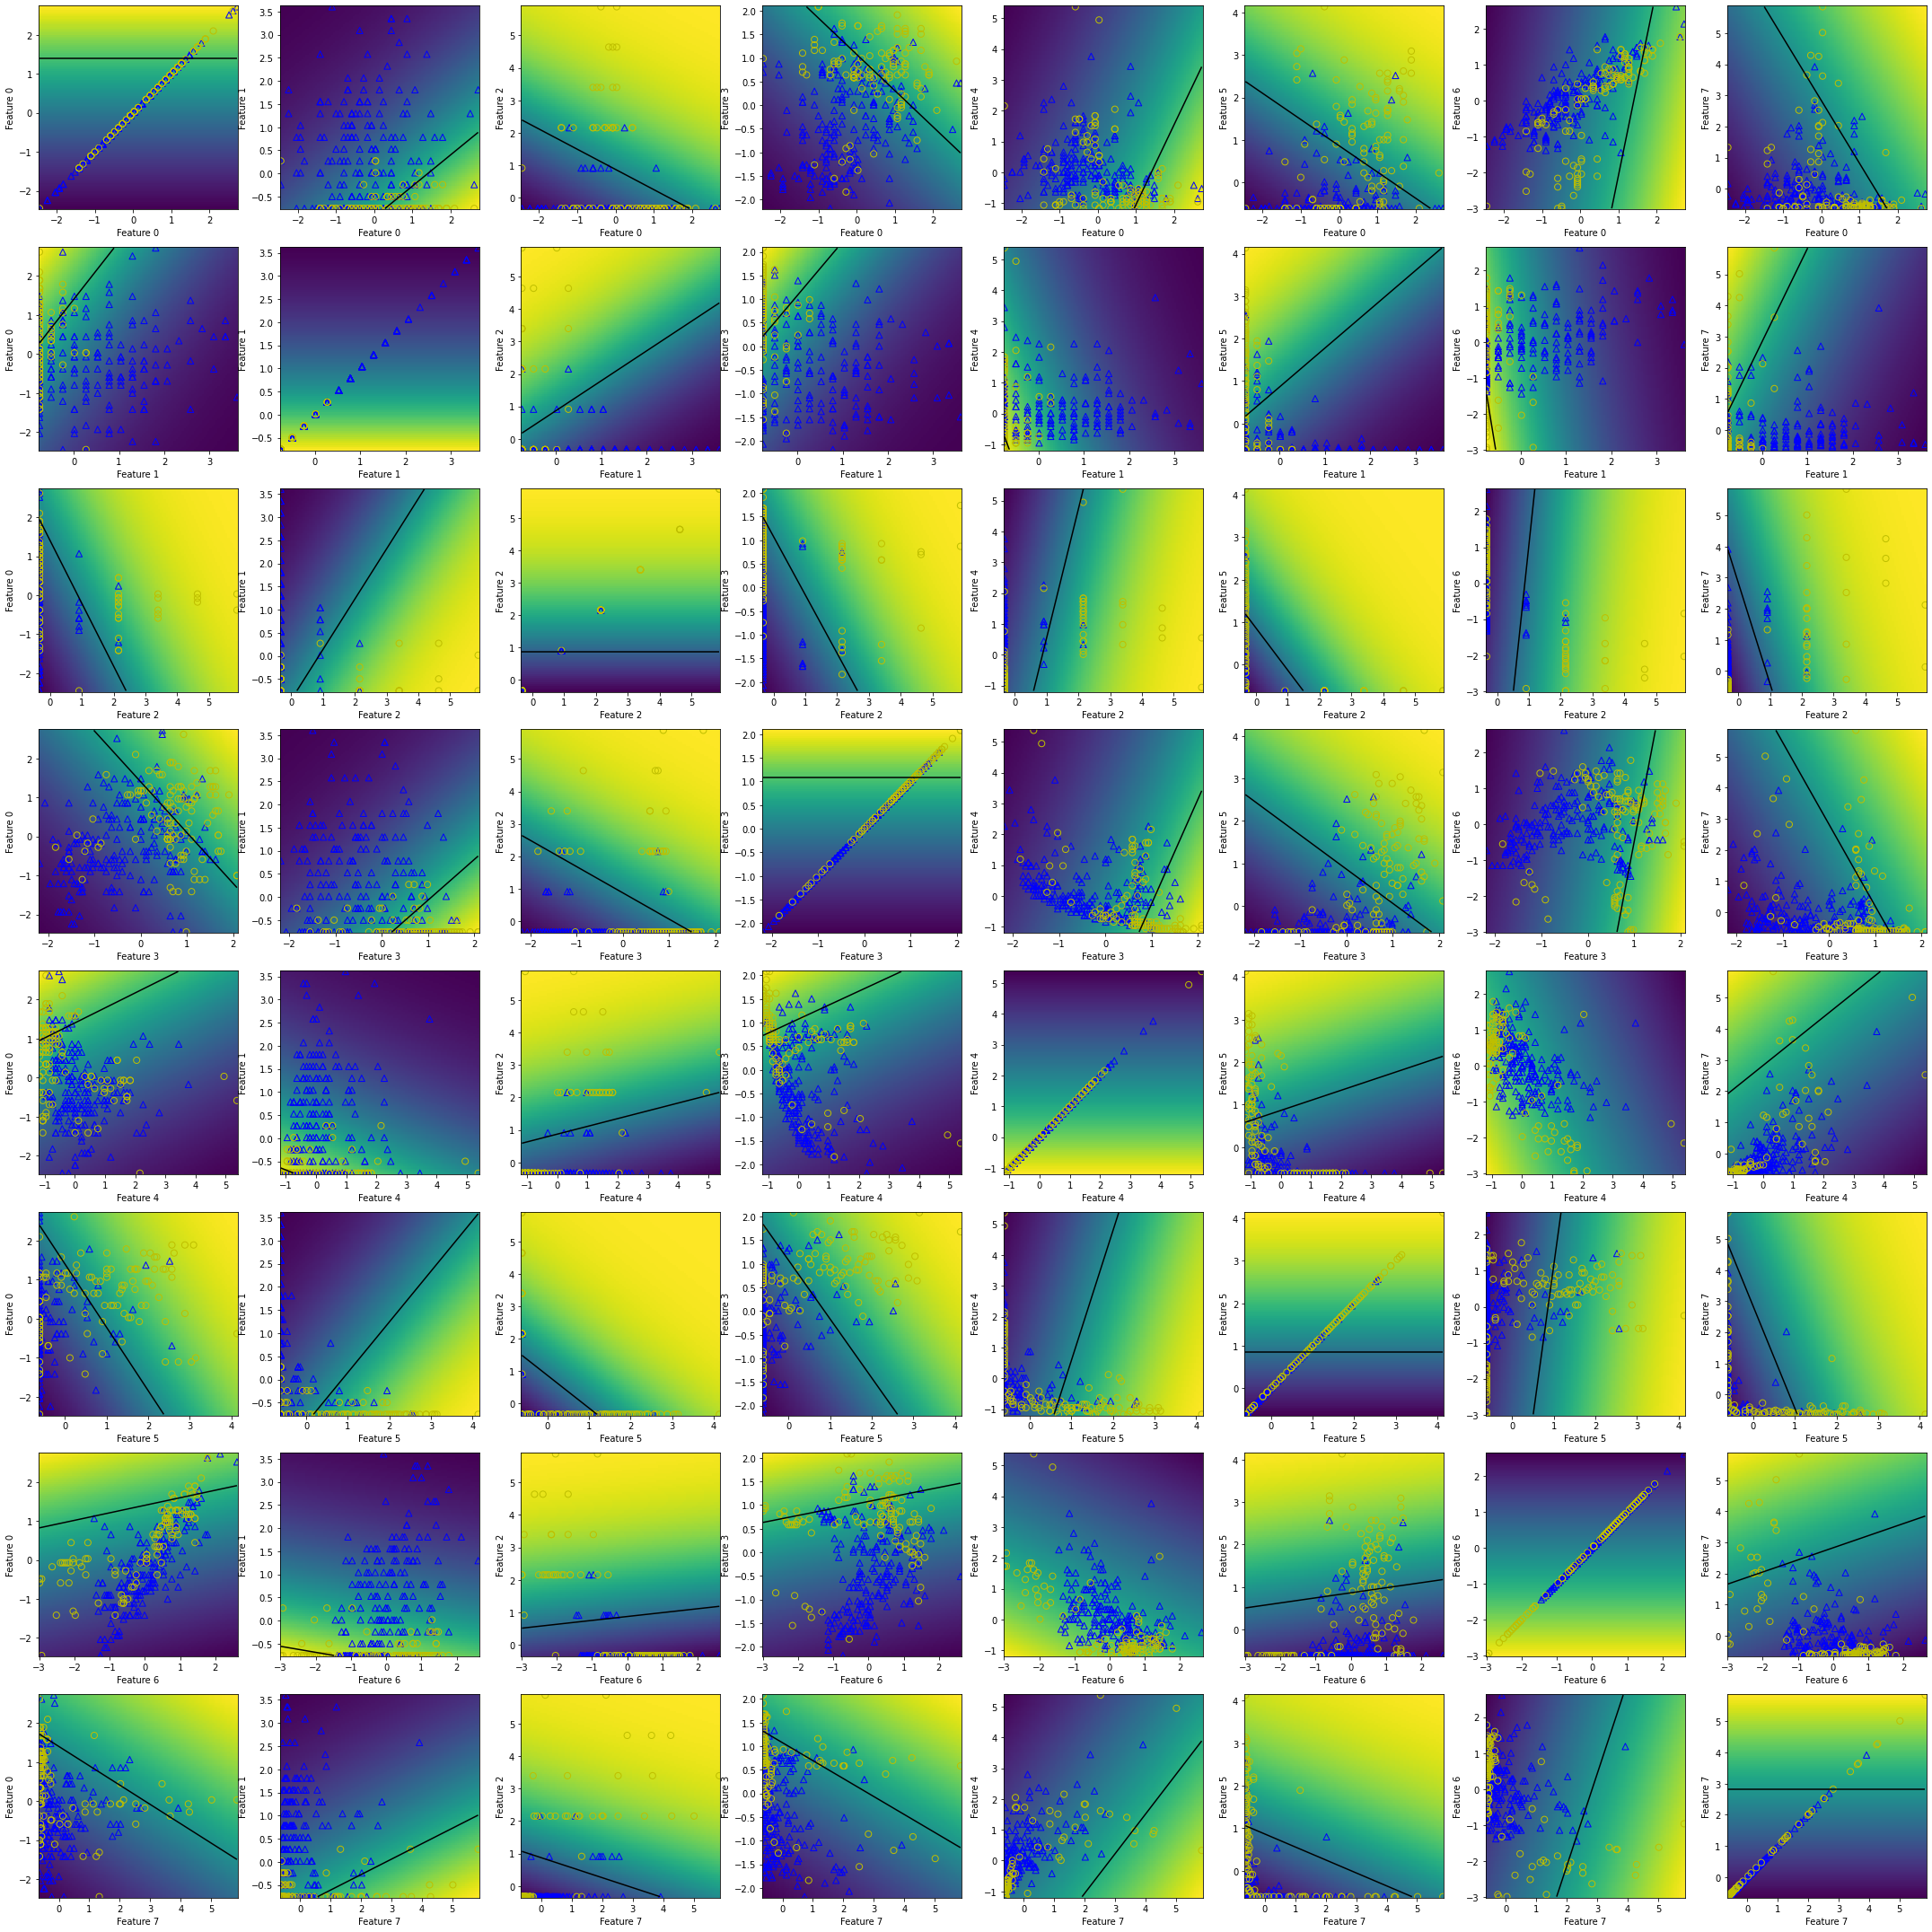

In [31]:
# Train and a logistic regression model with 300 epochs and learning rate 0.0001
clf = LogisticRegression(eta = 0.0001, epochs = 300, minibatches=1, random_seed=42)
clf.fit(X_test_scaled, y_test) # Here we are training our model on the test data set and the corresponfing target feautures

# Initialising subplots 8x8 and figure size of 30x30
fig, axes = plt.subplots(8, 8, figsize=(30, 30))

# We want to compare each and every feature with all of the other features in the data 
for i in range(0, 8):
    for j in range(0, 8):
        feature_1 = i
        feature_2 = j
        
        # Setting the axes for our plot
        ax = axes[i, j]

        # Setting labels for x and y axis 
        ax.set_xlabel(f"Feature {feature_1}")
        ax.set_ylabel(f"Feature {feature_2}")
        
        # Getting the minimum value along each column of X_test_scaled
        mins = X_test_scaled.min(axis=0)
        
        # Getting the maximum value along each column of X_test_scaled
        maxs = X_test_scaled.max(axis=0)

        # This creates the width of x for the plot 
        x0 = np.linspace(mins[feature_1], maxs[feature_1], 100)
        
        # This creates the height y for the plot
        x1 = np.linspace(mins[feature_2], maxs[feature_2], 100)
        
        # np.meshgrid created the grid, it takes in two 1D arrays and it returns
        # two 2D arrays which represents all possible combinations of the input arrays as coordinates.
        # This function can be thougth as creating a canvas that we can paint on.
        X0, X1 = np.meshgrid(x0, x1)
        
        # Ravel will flatten both of the two dimensional 100x100 arrays to 10000x1 arrays
        # Then np.c will concatenate the into a 2D array of size 10000x2 with all X0 
        # values in the left column and all X1 values in the right column.
        X_two_features = np.c_[X0.ravel(), X1.ravel()]
        
        # Creates a zero array of size 10000x8
        X_plot = np.zeros(shape=(X_two_features.shape[0], X_test_scaled.shape[1]))
        
        # Assigns to all rows of feature 1 the values of all rows of in first column of X_two_features
        X_plot[:, feature_1] = X_two_features[:, 0]
        
        # Assigns to all rows of feature 1 the values of all rows of in first column of X_two_features
        X_plot[:, feature_2] = X_two_features[:, 1]
        
        # We use our perceptron model in order to predict the probability score of our features in our plot
        y_pred = clf.predict_proba(X_plot)
        
        # Reshaping into the shape 100x100
        Z = y_pred.reshape(X0.shape)

        # This line creates the background color which is referred to as the pseudocolor plot. 
        # It is supposed to show where the features of the data is supposed be based on the color
        # density of the plot.
        ax.pcolor(X0, X1, Z)
        
        # This plots the linear line which is supposed to show where we seperate our to features
        ax.contour(X0, X1, Z, levels=[0.5], colors='k')
        
        # Here we plot each of the features scattered for both classes of fetal_health 1 and 0
        ax.scatter(X_test_scaled[y_test == 0, feature_1], X_test_scaled[y_test == 0, feature_2], color="b", marker="^", s=50, facecolors="none")
        ax.scatter(X_test_scaled[y_test == 1, feature_1], X_test_scaled[y_test == 1, feature_2], color="y", marker="o", s=50, facecolors="none")

# These are self explanatory 
fig.tight_layout()
plt.show()

### The purpose, components and what it shows and what it does not show.

The purpose of the plot was to compare each of the features with all of the other features of our data and see if they could be linearly separated using our Logistic Regression model. The background color and the contour shows where the data is supposed to be separated based on our model. And the figures scattered is from the test data which shows where they actually are on the plot. So we base the estimated classification based on the prediction we made on our feauture plot. The model is trained on the test data and then the prediction is also done on test data. Plot does not show how the model will behave for new unseen data.

## Part VI: Additional discussion

### Part I:
1. What kind of plots did you use to visualize the raw data, and why did you choose these types of plots?

Answer:

I mostly looked at the tables raw and histogram with graphs which showed the distribution curves. I also did a count plot to check how many we had of each classes 1 and 0. I used a violin plot before and after scaling in order to check that the data had beeen scaled correctly.

### Part II:
1. What happens if we don't shuffle the training data before training the classifiers like in Part IV?

Answer:

If the data is ordered in a particular pattern then the classifier might try to memorise these patterns. This can lead to overfitting as the model will perform well on the training data but not on new unseen data. Shuffling helps with generalization, it ensures that for each epoch the model is exposed to different sequence of samples. This will help the model to recognise feature across different contexts.

2. How could you do the same train/test split (Point 1.-4.) using scikit-learn?

Answer:

With scikit-learn you can easily use the function train_test_split.

### Part IV:
1. How does increasing the dataset size affect the performance of the logistic regression model? Provide a summary of your findings.

Answer:
For the logistic regression, based on our heatmaps we see that the model accuracy increases as the dataset size increases. We see that the accuracy is in the range of 0.86 and higher when the sizes are larger.


2. Describe the relationship between the number of epochs and model accuracy

Answer:

An epoch is a single pass over the entire dataset during model training. And during each epoch the model adjusts the parameters using backpropogation in order to minimize the loss function. With more epochs the models accuracy tends to increase as the models understanding of the data will become better for each epoch. To many epochs can lead to overfitting as the model will focus to much on the training data.

3. Which classifier is much slower to train and why do you think that is?

Answer:

I think that the Logistic Regression classifier is the slowest one because its update step uses gradient descent or other batch algoritms. It also maps real valued inputs into probabilities using the logistic function. The overall Logistic regression needs more complex calculations and it will take more time than the other two. Adaline and Perceptron uses more simpler update rules.


4. One classifier shows strong fluctuations in accuracy for different dataset sizes and number of epochs. Which one is it and why do you think this happens?

Answer:

The Perceptron model seems to be the one that fluctuates the most. It has sometimes low accuracies even though the dataset sizes increases or the number of epochs are higher. 

The Perceptron is a linear binary classifier which aims to find a hyperplane that separates data points of differents classes. During training it updates it weight based on whether or not the prediction mathes the true label. So if the prediction were to be wrong it will update its weight. This is a very simple model, for which if data is linearly separable then it will converge quickly. But if the data is not linearly separable then the Perceptron might strugle and may not converge, even if it were to converge it is not garantueed to be the optimal solution.